# NB4. Models of Networks

## A. Models of Networks.

Consider the following [Graph Generators](https://networkx.github.io/documentation/stable/reference/generators.html):

**Random Network Model**: The function ```erdos_renyi_graph(n,p)``` returns a $G_n,p$ random graph with the following parameters:
* n - The number of nodes.
* p - Probability fo edge creation.

**Small World Model ** : The function ```watts_strogatz_graph(n,k,p)``` returns a small-world graph with the following parameters:
* n - The number of nodes.
* k - Each node is joined with its k nearest neighbors in a ring topology.
* p - The probability of rewiring each edge.

In [1]:
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 

### Task 1

Simulate different networks using the Erdos-Renyi Model considering the following parameters:

(a) N = 100, p = 0.20

(b) N = 100, p = 0.40

(c) N = 100, p = 0.60

(d) N = 100, p = 0.80

For each network plot its degree distribution. Additionally, make a comparative table including:
* Number of links.
* Expected number of links using the equation:
$$ \langle L \rangle = p \frac{N(N-1)}{2}$$
* Average degree.
* Expected average degrees using the equation:
$$\langle k \rangle = p(N-1)$$
* Density.
* Expected density using the equation:
$$\langle d \rangle = p$$
* Average Shortest Path.
* Expected Average Shortest Path using the equation:
$$\langle l \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)}$$

In [2]:
# Simulation of different networks
erdos20 = nx.erdos_renyi_graph(n=100, p=0.20, seed=None, directed=False)
erdos40 = nx.erdos_renyi_graph(n=100, p=0.40, seed=None, directed=False)
erdos60 = nx.erdos_renyi_graph(n=100, p=0.60, seed=None, directed=False)
erdos80 = nx.erdos_renyi_graph(n=100, p=0.80, seed=None, directed=False)

In [3]:
#Notebook Equations
def links(N,P):
    part1 = N*(N-1)/2
    L = P*part1
    return int(L)
    
def average_degree(N,P):
    K = P*(N-1)
    return K

def density(P):
    return P

def average_short_path(N,P):
    K = P*(N-1)
    l = np.log(N)/np.log(K)
    return l

In [4]:
# Create lists to iterate over their items
all_networks = [erdos20, erdos40, erdos60, erdos80]

#       erdos20     erdos40      erdos60     erdos80
nps = [[100, .20], [100, .40], [100,.60], [100,.80]]

# Compute using Networkx as nx
to_df_1 = []
for i in all_networks:
    num_links = nx.number_of_edges(i)
    degree_sequence = [i.degree(n) for n in i.nodes]
    avg_degree = statistics.mean(degree_sequence)
    density = nx.density(i)
    av_short_path = nx.average_shortest_path_length(i)
    
    lis_of_them = [num_links, avg_degree, density, av_short_path]
    to_df_1.append(lis_of_them)

# Compute By the given formulas
to_df_2 = []
for j in nps:
    num_links = links(j[0], j[1])
    av_degree = average_degree(j[0], j[1])
    density = j[1]
    av_short_path = average_short_path(j[0], j[1])
    
    lis_of_them_2 = [num_links, av_degree, density, av_short_path]
    to_df_2.append(lis_of_them_2)
    
# to_df_1 and to_df_2 are list in which the data computed is stored

In [5]:
# Dataframe with nx values
df1 = pd.DataFrame(data=to_df_1, columns=['num_links', 'avg_degree', 'density', 'avg_shts_path'])
df1

,num_links,avg_degree,density,avg_shts_path
0,962,19.24,0.194343,1.828081
1,2008,40.16,0.405657,1.594343
2,2981,59.62,0.602222,1.397778
3,3924,78.48,0.792727,1.207273


In [6]:
# Dataframe with values computed with formulas
df2 = pd.DataFrame(data=to_df_2, columns= ['num_links', 'avg_degree', 'density', 'avg_shst_path'])

In [7]:
print("Table using Networkx commands")
df1

Table using Networkx commands


,num_links,avg_degree,density,avg_shts_path
0,962,19.24,0.194343,1.828081
1,2008,40.16,0.405657,1.594343
2,2981,59.62,0.602222,1.397778
3,3924,78.48,0.792727,1.207273


In [8]:
print("Table using the equations")
df2

Table using the equations


,num_links,avg_degree,density,avg_shst_path
0,990,19.8,0.2,1.542418
1,1980,39.6,0.4,1.251803
2,2970,59.4,0.6,1.127531
3,3960,79.2,0.8,1.053338


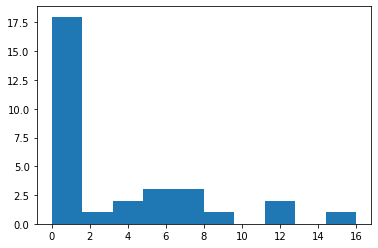

In [9]:
plt.hist(nx.degree_histogram(erdos20))
plt.show()

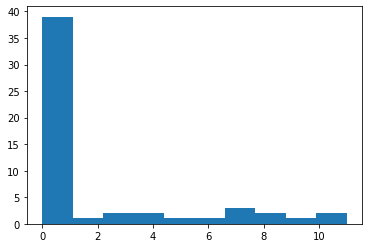

In [10]:
plt.hist(nx.degree_histogram(erdos40))
plt.show()

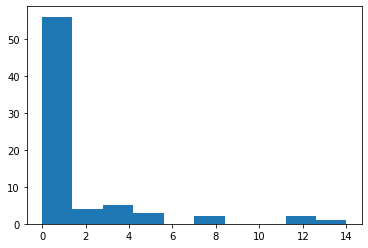

In [11]:
plt.hist(nx.degree_histogram(erdos60))
plt.show()

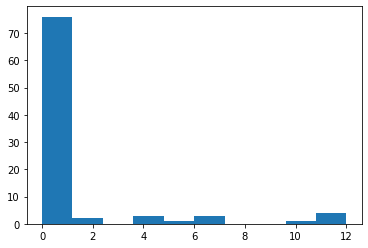

In [12]:
plt.hist(nx.degree_histogram(erdos80))
plt.show()

### Task 2

Consider a the simulation of different random network with a fixed value of the number of nodes but different values of link probability. Naturally, at the beginig at p = 0, the system is totally fragmented into singletons. An increasing number of pairs of nodes will get connected, and through them connected subnetworks will be formed as the link probability increases. 

Erdos and Renyi discovered a transition point from configurations in which all subnetworks are relatively small, to a configuration where at least one of the subnetworks contains almost all the nodes. This transition can be observe in Fig. 1. 




<img src="Plot1.png" width="360"> </img>

<center> Fig. 2</center>


Don't forget that the probability and the expected degree $\langle k \rangle$  follow the relation:

$$ \langle L \rangle = p \frac{N(N-1)}{2}$$

Fig. 1 is an sketch of the evoluation. Reproduce a similar plot for networks with 1000 nodes. Use 25 equally spaced values of the link probability, in the interval [0, 0.005]. For each value, generate 20 different networks, compute the relative size of the giant component. 

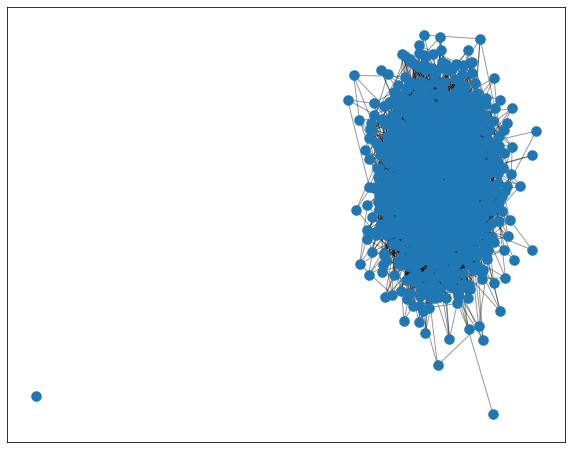

In [13]:
import math
erdos = nx.erdos_renyi_graph(n=1000,p=0.01)
fig = plt.figure(figsize=(10, 8))
# some visual styling for the figure
ax = fig.gca()
ax.grid(False) # no grid
ax.get_xaxis().set_ticks([]) # no ticks on the axes
ax.get_yaxis().set_ticks([])
# run the spring layout algorithm over the network
pos = nx.spring_layout(erdos, iterations = 50, k = 2/math.sqrt(1000))
# draw the network using the computed positions for the nodes
nx.draw_networkx_edges(erdos, pos, width = 1, alpha = 0.4)
nx.draw_networkx_nodes(erdos, pos, node_size=100, alpha = 1,
linewidths = 0.5)
plt.show()

## Task 3
In the Watts-Strogratz Model, there is range of rewiring probability values between p = 0.01 and p = 0.1 in the average shortest-path length is close to that of an equivalent random network; and at the same time, the clustering coefficient from the model is high. Nevertheless, the model cannot generate hubs. Fig. 2 presents the average path length and the clustering coefficient as a function of the rewiring probability. Observe that the x-axis is in a logarithmic scale.


<img src="Plot2.png" width="360"> </img>

<center> Fig. 2</center>


Reproduce a similar plot, by calculating:
* the average shortest path ($\langle l \rangle$)
* and the average clustering coefficient ($C$)

for Watts–Strogatz networks constructed for different values of the rewiring probability p. Take 20 equally spaced values of p between 0 and 1. For each value of p, build 20 different networks and compute the average shortest path and average clustering coefficient. To plot the two curves on a common y-axis, you can normalize the values by dividing them by the corresponding values for the probability p = 0.

### B. Identification of Network Models [40 pts]

Analyze each of the 4 Networks and determine which of the three models was used to generate them:
* model1.csv
* model2.csv
* model3.csv
* model4.csv

Justify your selection in each case.

In [14]:
csv1 = nx.read_adjlist("model1.csv")
csv2 = nx.read_adjlist("model2.csv")
csv3 = nx.read_adjlist("model3.csv")
csv4 = nx.read_adjlist("model4.csv")

In [15]:
csv_list = [csv1, csv2, csv3, csv4]
to_df_csv = []
for i in all_networks:
    num_links = nx.number_of_edges(i)
    degree_sequence = [i.degree(n) for n in i.nodes]
    avg_degree = statistics.mean(degree_sequence)
    density = nx.density(i)
    av_short_path = nx.average_shortest_path_length(i)
    
    lis_of_them = [num_links, avg_degree, density, av_short_path]
    to_df_csv.append(lis_of_them)

In [16]:
df_csv = pd.DataFrame(data=to_df_csv, columns=['num_links', 'avg_degree', 'density', 'avg_shts_path'])
df_csv

,num_links,avg_degree,density,avg_shts_path
0,962,19.24,0.194343,1.828081
1,2008,40.16,0.405657,1.594343
2,2981,59.62,0.602222,1.397778
3,3924,78.48,0.792727,1.207273


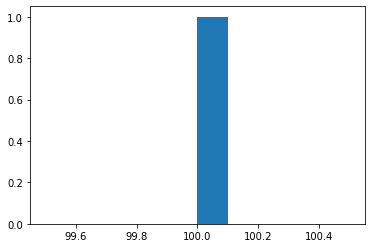

In [17]:
plt.hist(nx.degree_histogram(csv1))
plt.show()

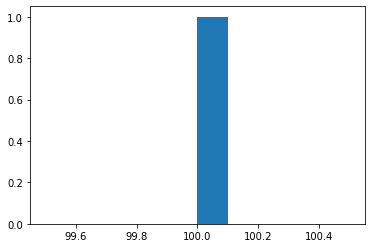

In [18]:
plt.hist(nx.degree_histogram(csv2))
plt.show()

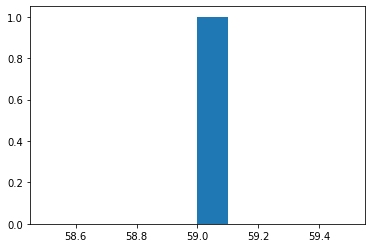

In [19]:
plt.hist(nx.degree_histogram(csv3))
plt.show()

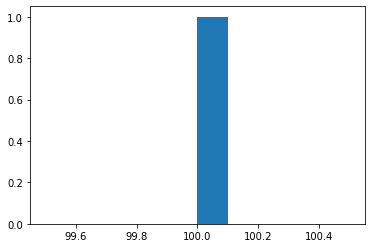

In [20]:
plt.hist(nx.degree_histogram(csv4))
plt.show()

In [21]:
# Analysis of model1.csv (10 pts)

In [22]:
# Analysis of model2.csv (10 pts)

In [23]:
# Analysis of model3.csv (10 pts)

In [24]:
# Analysis of model4.csv (10 pts)